##Step 1: Understanding the Problem
The goal is to build a machine learning model that provides personalized healthcare recommendations based on patient data. The project document describes a dataset with features like blood cell counts, hemoglobin, glucose, cholesterol, and demographic/lifestyle factors, but the provided blood-dataset.csv contains features related to blood donation (Recency, Frequency, Monetary, Time, Class). This mismatch suggests either:

1. The provided dataset is incorrect for the project description.
2. The project can be adapted to use the blood donation dataset to predict donation behavior or related recommendations (e.g., whether a donor should donate again).

For this response, I'll assume the provided dataset (blood-dataset.csv) is what you have to work with, and we'll adapt the project to predict whether a donor is likely to donate again (Class: 1 for donated, 0 for not donated) and provide recommendations based on that. If you have access to the correct blood health dataset (as described in the PDF), please clarify or provide it, and I can adjust the approach.

Objective: Use the blood donation dataset to predict donor behavior (Class) and generate recommendations (e.g., encourage frequent donors to continue or suggest re-engagement for lapsed donors).

##Step 2: Dataset Preparation
The dataset (blood-dataset.csv) has the following columns:

- Recency: Months since last donation.
- Frequency: Total number of donations.
- Monetary: Total blood donated (in c.c., where Monetary = Frequency * 250).
- Time: Months since first donation.
- Class: Binary target (1 = donated within a specific period, 0 = did not).

Note: Monetary is redundant since it’s derived from Frequency (Monetary = Frequency * 250). We can drop it to avoid multicollinearity.

Data Sources:

- For this project, we’ll use blood-dataset.csv.
- If you have access to additional data (e.g., demographic or health data), you can integrate it later.

Features:

- Numerical: Recency, Frequency, Time.
- Target: Class (binary).

Labels: The Class column will be the target variable for classification.

## Step 3: Data Exploration and Visualization

Let’s load the dataset, explore it, and visualize key patterns.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None

First 5 rows:
   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0

Descriptive Statistics:
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307   

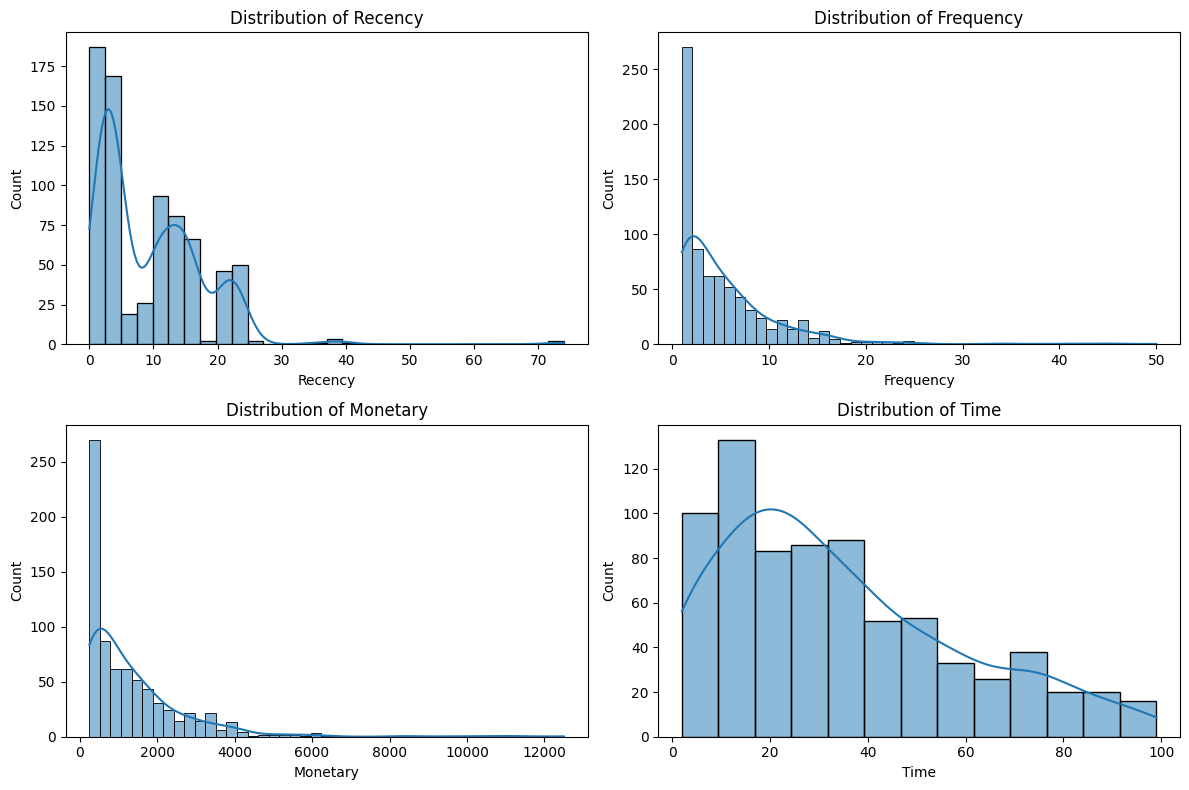

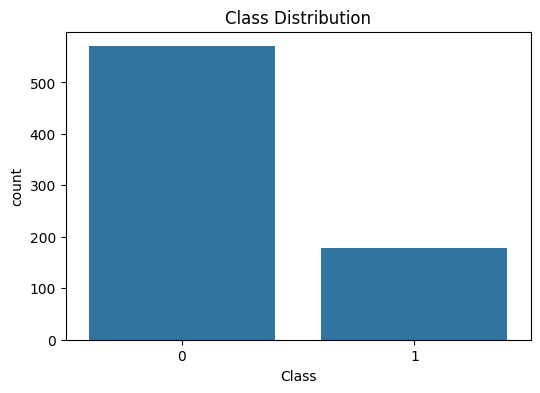

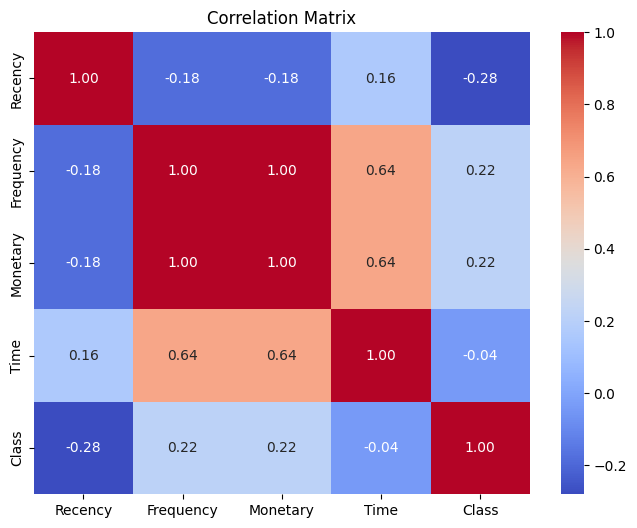

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/blood-dataset.csv')

# Display basic information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nDescriptive Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualize distributions of numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary', 'Time'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##Step 4: Data Preprocessing
We’ll preprocess the data by:

- Dropping the redundant Monetary column.
- Standardizing numerical features (Recency, Frequency, Time).
- Splitting the data into training and testing sets.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Drop Monetary column
data = data.drop('Monetary', axis=1)

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Define numerical features
numerical_features = ['Recency', 'Frequency', 'Time']

# Create preprocessing pipeline for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Notes:

- Since all features are numerical, we only need a StandardScaler.
- If you had categorical features (e.g., gender, smoking_status), you’d add a OneHotEncoder to the pipeline, as shown in the project document.
- The train-test split uses 80% training and 20% testing data.

Step 5: Feature Engineering
For this dataset, the features are straightforward, but we can create a new feature to enhance the model:

- Donation Rate: Frequency / Time (donations per month since first donation).

In [3]:
# Add donation rate feature
data['Donation_Rate'] = data['Frequency'] / (data['Time'] + 1)  # Add 1 to avoid division by zero

# Update features
X = data.drop('Class', axis=1)
y = data['Class']
numerical_features = ['Recency', 'Frequency', 'Time', 'Donation_Rate']

# Update preprocessor with new feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Model Selection and Training

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[102  11]
 [ 25  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       113
           1       0.52      0.32      0.40        37

    accuracy                           0.76       150
   macro avg       0.66      0.61      0.62       150
weighted avg       0.73      0.76      0.74       150



compare other algorithms (e.g., Logistic Regression, XGBoost) using a loop:

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, clf in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\nResults for {name}:")
    print(classification_report(y_test, y_pred))


Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150


Results for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       113
           1       0.52      0.32      0.40        37

    accuracy                           0.76       150
   macro avg       0.66      0.61      0.62       150
weighted avg       0.73      0.76      0.74       150


Results for SVM:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       113
           1       0.60      0.16      0.26        37

    accuracy                           0.77       150
   macro avg       0.69      0.56      0.56     

## Step 7: Model Evaluation

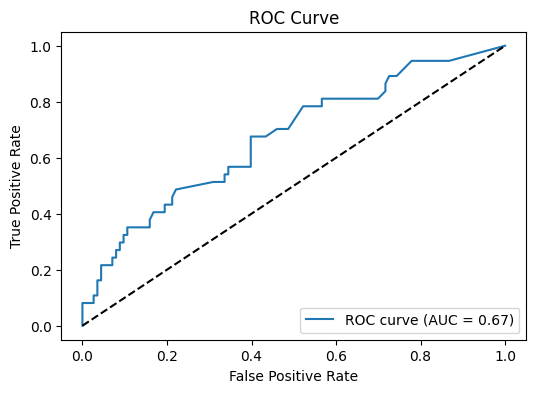

In [6]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f"\nCross-Validation F1 Scores: {cv_scores}")
print(f"Average CV F1 Score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation F1 Scores: [0.33333333 0.17241379 0.04761905 0.51351351 0.09090909]
Average CV F1 Score: 0.23 ± 0.17


## Step 8: Recommendation System Implementation
Based on the model’s predictions, we’ll generate recommendations. For example:

- Class 1 (Donated): Encourage continued donations.
- Class 0 (Not Donated): Suggest re-engagement strategies (e.g., reminders, incentives).

In [8]:
def generate_recommendations(patient_data, model):
    prediction = model.predict(patient_data)[0]
    recommendation_mapping = {
        0: 'Not likely to donate soon. Send reminders or incentives to re-engage.',
        1: 'Likely to donate again. Encourage continued donations with appreciation messages.'
    }
    return recommendation_mapping[prediction]

# Example donor data
example_donor_data = pd.DataFrame({
    'Recency': [2],
    'Frequency': [10],
    'Time': [28],
    'Donation_Rate': [10 / (28 + 1)]
})

# Generate recommendation
print("\nRecommendation for example donor:")
print(generate_recommendations(example_donor_data, model))


Recommendation for example donor:
Likely to donate again. Encourage continued donations with appreciation messages.


##Step 9: Deployment

In [11]:
from flask import Flask, request, jsonify
import pickle

# Save the model
with open('blood_donation_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Flask app
app = Flask(__name__)

# Load the model
with open('blood_donation_model.pkl', 'rb') as f:
    model = pickle.load(f)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    donor_data = pd.DataFrame({
        'Recency': [data['Recency']],
        'Frequency': [data['Frequency']],
        'Time': [data['Time']],
        'Donation_Rate': [data['Frequency'] / (data['Time'] + 1)]
    })
    recommendation = generate_recommendations(donor_data, model)
    return jsonify({'recommendation': recommendation})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
